# Task 2:- Wine Quality Prediction using Linear Regression.

# import necessary library

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [2]:
df = pd.read_csv("winequality.csv", sep=';')

#print first five data
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
#check missing value
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

<Axes: ylabel='quality'>

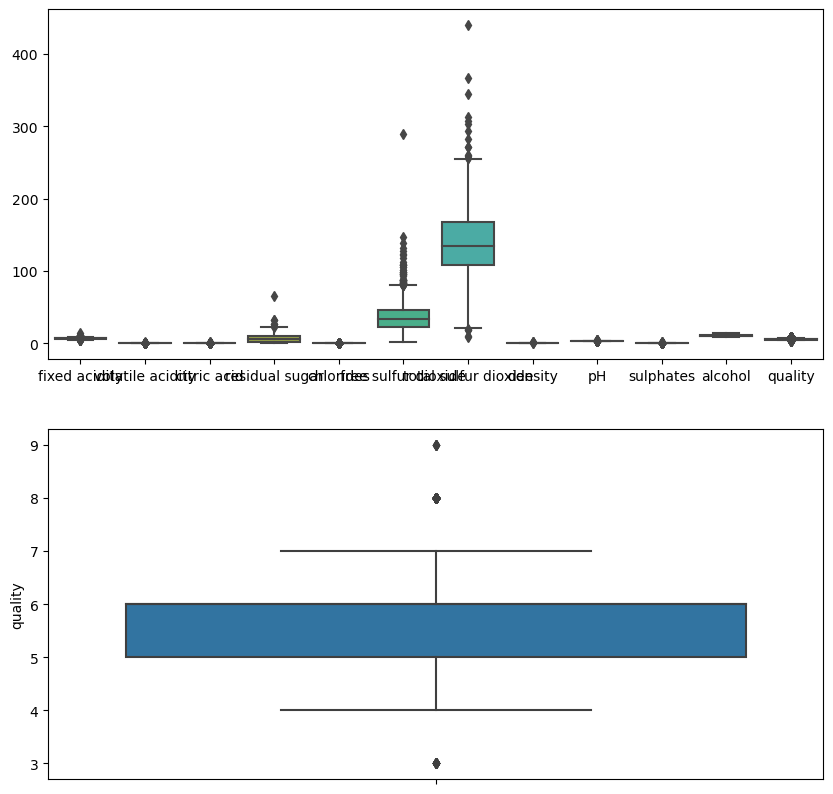

In [5]:
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,10)
sns.boxplot(data=df,orient="v",ax=axes[0])
sns.boxplot(data=df,y="quality",orient="pH",ax=axes[1])

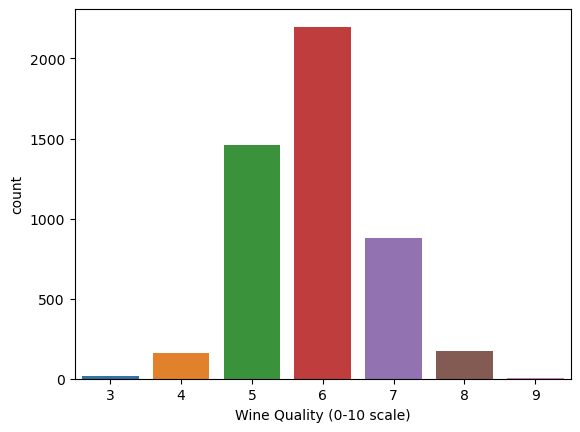

In [6]:
sns.countplot(x="quality", data=df)
plt.xlabel("Wine Quality (0-10 scale)")
plt.show()

<Axes: >

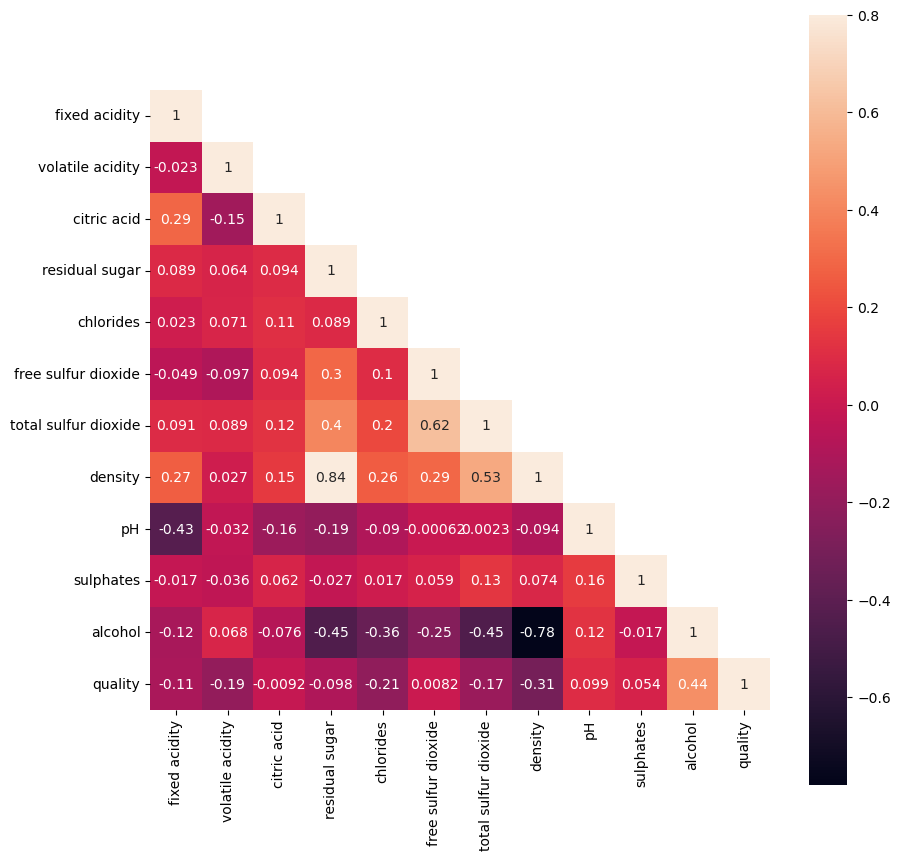

In [7]:
#correlation 

corr=df.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True)

# Splitting Data into train - test model

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X=df.iloc[:, :-1].values
y=df.iloc[:, -1].values
X=np.append(arr=np.ones((X.shape[0],1)), values=X, axis=1)

# splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler

#scaling dataset

sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

# To make prediction

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
reg=LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [13]:
#prediction
pred = reg.predict(X_test)

In [14]:
prediction = pd.DataFrame(pred)
prediction.head()

,0
0,5.590650
1,5.466122
2,6.088268
3,6.793538
4,5.970548


# Plot predicted value

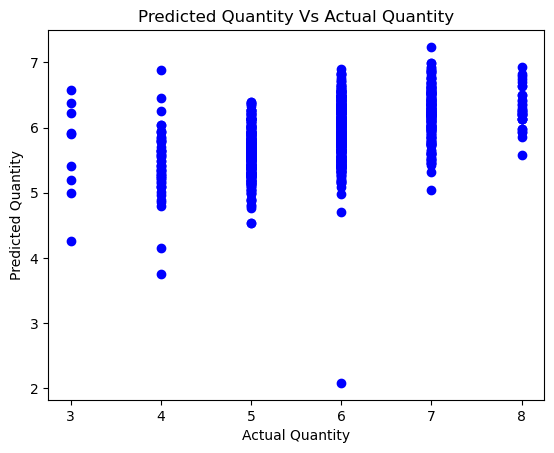

In [15]:
plt.scatter(y_test,pred, c='b')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Predicted Quantity Vs Actual Quantity')
plt.show()